#pizza place sales analysis
. provided with a year worth of sales from a fictititious pizza place,including the date and time of each order and the pizza served with additional details on the type,size,quantity,price and ingredients
## data
.i was provided with four zip files to be merged as one dataframe


In [186]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns  #importing required libraries
sns.set()

In [187]:
#importing our data frames
order_data=pd.read_csv("/content/orders.csv")
order_details_data= pd.read_csv("/content/order_details.csv")
pizza_type_data=pd.read_csv("/content/Pizza-Place-Sales-4.csv")
pizza_data=pd.read_csv("/content/pizzas.csv")


##data merging using inner join

In [188]:
#data merging
df=order_details_data.merge(order_data, on="order_id") \
                      .merge(pizza_data, on="pizza_id") \
                      .merge(pizza_type_data, on="pizza_type_id")


In [189]:
 df.head(50)#checking out sample of the data

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,7,3,ital_supr_m,1,2015-01-01,12:12:28,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
7,8,3,prsc_argla_l,1,2015-01-01,12:12:28,prsc_argla,L,20.75,The Prosciutto and Arugula Pizza,Supreme,"Prosciutto di San Daniele, Arugula, Mozzarella..."
8,9,4,ital_supr_m,1,2015-01-01,12:16:31,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
9,10,5,ital_supr_m,1,2015-01-01,12:21:30,ital_supr,M,16.50,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."


In [190]:
df.index

RangeIndex(start=0, stop=48620, step=1)

In [191]:
df.shape#mapping out the number of columns and row

(48620, 12)

#exploratory data analysis
##data cleaning process

In [192]:
df.isna().sum()#checking for null values

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
date,0
time,0
pizza_type_id,0
size,0
price,0
name,0


In [193]:
df.info()#checking the types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [194]:
#proper cleaning of our data
#we will change our date and time to datetime
df["date"].value_counts()

,count
date,
2015-11-26,261
2015-11-27,259
2015-10-15,258
2015-07-04,233
2015-07-03,207
...,...
2015-12-27,87
2015-11-22,82
2015-12-29,77


In [195]:
df["date"]=pd.to_datetime(df["date"])#changing the date column to datetime

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [197]:
df["time"].value_counts()

,count
time,
12:32:00,26
11:59:10,24
12:26:04,23
12:52:36,23
12:53:29,23
...,...
15:25:31,1
14:03:30,1
21:40:04,1


In [198]:
df["time"]=pd.to_datetime(df["time"])#changing the time column to datetime format

/tmp/ipython-input-4263164609.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"]=pd.to_datetime(df["time"])#changing the time column to datetime format


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


#first question
what is the total revenue/sales

given by the mormal way of finding sales which is price multiply by quantity

In [200]:
#to get to the total revenue
df["revenue"]=df["quantity"]*df["price"]

In [201]:
total_revenue=df["revenue"].sum()
print("total revenue:", total_revenue)

total revenue: 817860.05


multiplying each quantity by price and summing it up gives our total revenue which is 817860.05

#second question
##to find the total quantity sold

In [202]:
total_quantity_sold=df["quantity"].sum()
print("total quantity sold:",total_quantity_sold )


total quantity sold: 49574


using the sum method our total quantity sold=49574[link text](https://)

#third question
##to find the total orders

In [203]:
total_orders=df["order_details_id"].sum()
print("total orders:", total_orders)

total orders: 1181976510


#fourth question
##how many pizza do they sell

In [204]:
df["pizza_type_id"].value_counts()

,count
pizza_type_id,
classic_dlx,2416
bbq_ckn,2372
hawaiian,2370
pepperoni,2369
thai_ckn,2315
cali_ckn,2302
spicy_ital,1887
sicilian,1887
southw_ckn,1885


they sell 38 types of pizza

#fifth question
##to find the average price of the pizzas

In [205]:
average_price_of_pizza=df["price"].mean()
print("average_price_of_pizza:", average_price_of_pizza)

average_price_of_pizza: 16.494132044426163


#sixth question
##what are the peak hour of sales

In [206]:
df["hour"]=df["time"].dt.hour#we extracted hour here

In [207]:
hourly_sales=df.groupby("hour")["revenue"].sum()#grouping by hour and summing sales

In [208]:
#get peak hour
peak_hour=hourly_sales.idxmax()
print("peak hour of sale is:", peak_hour)

peak hour of sale is: 12


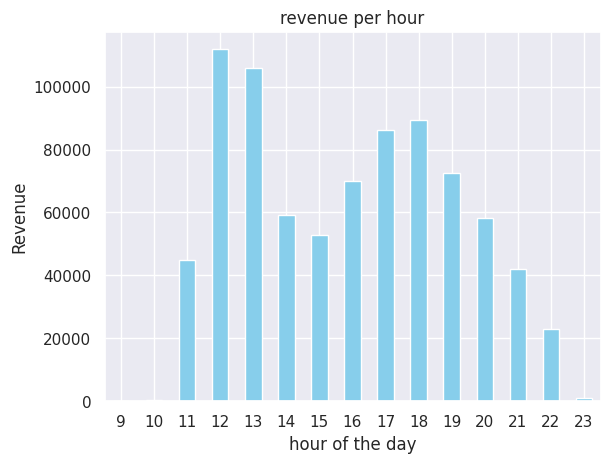

In [209]:
hourly_sales.plot(kind="bar",color="skyblue")
plt.xlabel("hour of the day")
plt.ylabel("Revenue")
plt.title("revenue per hour")
plt.xticks(rotation=0)
plt.savefig("revenue per hour", dpi=300, bbox_inches="tight")

plt.show()

the plot show that 12 and 13 which is are the peak hours of sales
but 12 is the peak hour of sales

#seventh question
##To find the total sales made on each week and which day of the week is when sales are made most

In [210]:
#extracting day by name
df["day_of_week"]=df["date"].dt.day_name()

In [211]:
#groupby day and sum sales
weekly_sales=df.groupby("day_of_week")["revenue"].sum()

In [212]:
#TO FIND The day with the highest sales
peak_day=weekly_sales.idxmax()
print("total sales per day:", weekly_sales)
print("day with the highest sales:", peak_day)

total sales per day: day_of_week
Friday       136073.90
Monday       107329.55
Saturday     123182.40
Sunday        99203.50
Thursday     123528.50
Tuesday      114133.80
Wednesday    114408.40
Name: revenue, dtype: float64
day with the highest sales: Friday


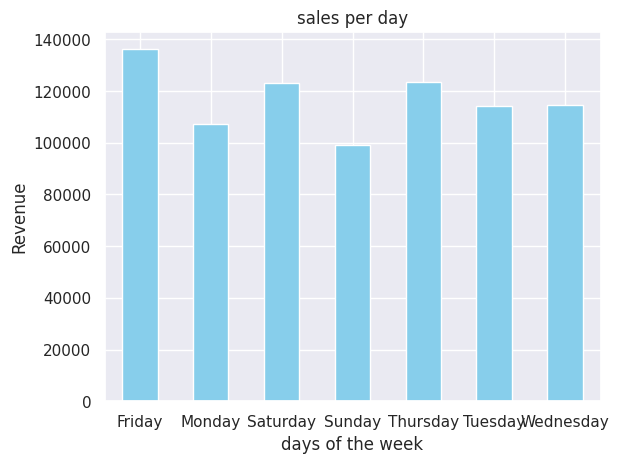

In [213]:
weekly_sales.plot(kind="bar",color="skyblue")
plt.xlabel("days of the week")
plt.ylabel("Revenue")
plt.title("sales per day")
plt.xticks(rotation=0)
plt.savefig("sales per day", dpi=300, bbox_inches="tight")

plt.show()

from my analysis i can denote that friday is daywith the highest sales
and also provided sales for eachh day

#eighthth question
##find the top5 best selling pizzas

In [214]:
top5_by_revenue=df.groupby("name")["revenue"].sum().sort_values(ascending=False).head(5)
top5_by_revenue

,revenue
name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25


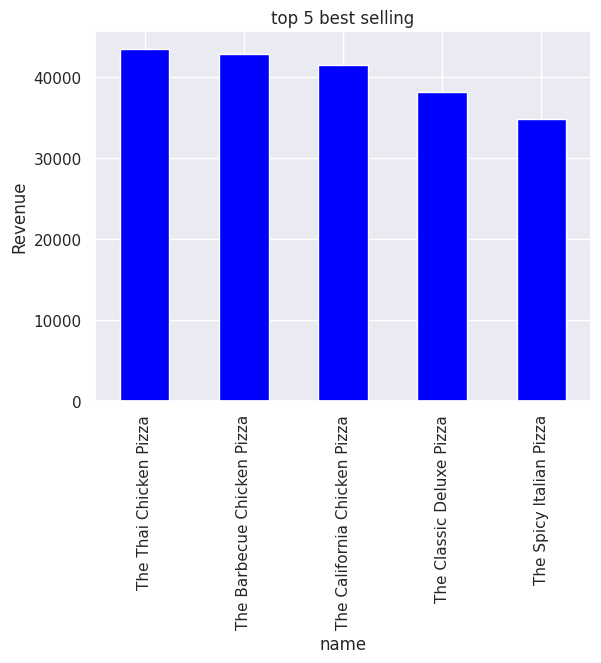

In [215]:
top5_by_revenue.plot(kind="bar",color="blue")
plt.xlabel("name")
plt.ylabel("Revenue")
plt.title("top 5 best selling")
plt.xticks(rotation=90)
plt.savefig("revenue per hour", dpi=300, bbox_inches="tight")

plt.show()

this plot above shows the top 5 best selling pizza
which make the thai chicken pizza the best selling

#ninth question
##to find the sales made in each month

In [216]:
df["month_in_words"]=df["date"].dt.month_name()#we created a column of months so we cananalyze better

In [217]:
sales_in_months=df.groupby("month_in_words")["revenue"].sum()
sales_in_months

,revenue
month_in_words,
April,68736.80
August,68278.25
December,64701.15
February,65159.60
January,69793.30
July,72557.90
June,68230.20
March,70397.10
May,71402.75


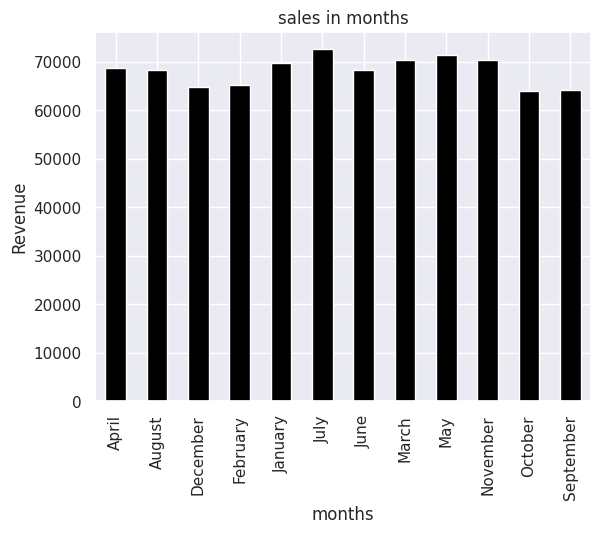

In [218]:
from matplotlib import markers
sales_in_months.plot(kind="bar",color="black",)
plt.xlabel("months")
plt.ylabel("Revenue")
plt.title("sales in months")
plt.savefig("sales in months", dpi=300, bbox_inches="tight")

plt.show()

the plot shows sales in each month and from this we can derive that there is more sales in july while there is low sale in september
the establisment can produce lower in september

#tenth question
##pizza types that are not doing well

In [219]:
low_perfoming_pizza=df.groupby("pizza_type_id")["revenue"].sum().sort_values(ascending=True).head(5)
low_perfoming_pizza

,revenue
pizza_type_id,
brie_carre,11588.50
green_garden,13955.75
spinach_supr,15277.75
mediterraneo,15360.50
spin_pesto,15596.00


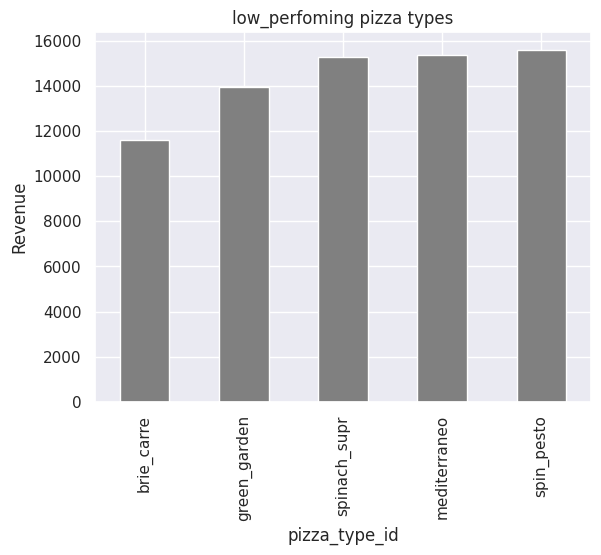

In [220]:
low_perfoming_pizza.plot(kind="bar",color="grey")
plt.xlabel("pizza_type_id")
plt.ylabel("Revenue")
plt.title("low_perfoming pizza types")
plt.xticks(rotation=90)
plt.savefig("low perfoming pizza", dpi=300, bbox_inches="tight")

plt.show()